# Color Palette Analysis: Emotional Impact in Famous Artworks 🎨
This project explores the emotional impact of color palettes used in famous artworks. By extracting dominant colors from paintings and mapping them to emotional responses, we aim to uncover the emotional narratives artists convey through their choice of colors.

## Objectives:
**1. Color Palette Extraction:** Use KMeans clustering to extract dominant color palettes from famous artworks.

**2. Emotional Mapping:** Map colors to emotions to analyze the emotional impact of each palette.

**3. Advanced Analysis:**
- Investigate color harmonies (Complementary, Analogous, Triadic) to understand how they enhance emotional storytelling.
- Compare emotional palettes across different art movements (e.g., Renaissance, Baroque, Modernism).

**4. Visualization and Insights:** Visualize color palettes, emotional distributions, and advanced insights to draw meaningful conclusions about the emotional language of colors in art.
  
This project blends the worlds of art, color theory, and data science, offering unique insights into the emotional power of colors.

## 1. Import Libraries

In [1]:
!pip install pillow numpy matplotlib seaborn scikit-learn colorthief pandas opencv-python

In [2]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd
import cv2
import random
from shutil import copyfile

## 2. Load Artworks

In [3]:
image_folder = "artworks" # Folder where all artwork images are stored
sample_folder = "sample_artworks" # Folder to save the sampled images
sample_size = 900 # Number of images to sample
n_clusters = 5 # Number of dominant colors to extract
image_size = (300, 300) # Resize images for faster processing

# Create the sample folder if it doesn't exist
if not os.path.exists(sample_folder):
    os.makedirs(sample_folder)

# Get all image filenames
all_images = [img for img in os.listdir(image_folder) if img.endswith(('.png', '.jpg'))]

# Randomly sample the images
sampled_images = random.sample(all_images, sample_size)

# Copy sampled images to the new folder
for image_file in sampled_images:
    src = os.path.join(image_folder, image_file)
    dst = os.path.join(sample_folder, image_file)
    copyfile(src, dst)

print(f"Sampled {sample_size} images and saved to '{sample_folder}'")

Sampled 900 images and saved to 'sample_artworks'


In [4]:
def load_and_preprocess_images(folder):
    images = []
    for img_file in os.listdir(folder):
        try:
            img_path = os.path.join(folder, img_file)
            with Image.open(img_path) as img:
                img = img.resize(image_size)  # Resize for faster processing
                img = img.convert('RGB')     # Ensure 3 color channels
                images.append(np.array(img))
        except Exception as e:
            print(f"Failed to load {img_file}: {e}")
    return images

images = load_and_preprocess_images(sample_folder)
print(f"Loaded {len(images)} images for analysis.")

Loaded 1701 images for analysis.


## 3. Extract Color Palettes

In [5]:
def extract_palette(image, n_clusters=n_clusters):
    # Reshape image to a 2D array of pixels
    pixels = image.reshape(-1, 3)
    
    # Fit KMeans to find dominant colors
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(pixels)
    palette = kmeans.cluster_centers_.astype(int)
    return palette

def plot_palette(palette):
    # Display the palette as a horizontal bar
    palette_img = np.zeros((50, 300, 3), dtype='uint8')
    steps = 300 // len(palette)
    for i, color in enumerate(palette):
        palette_img[:, i * steps:(i + 1) * steps] = color
    plt.imshow(palette_img)
    plt.axis('off')
    plt.show()

Image 1 Color Palette:


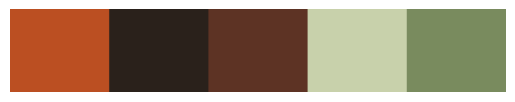

Image 2 Color Palette:


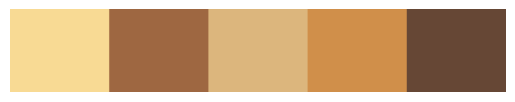

Image 3 Color Palette:


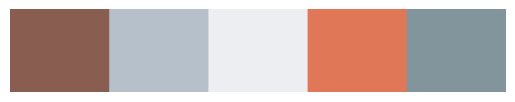

Image 4 Color Palette:


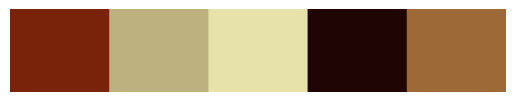

Image 5 Color Palette:


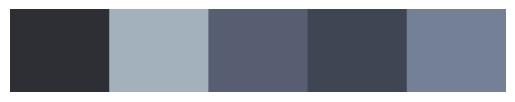

In [6]:
# Extract and display color palettes for a few sample images
for i, img in enumerate(images[:5]):
    palette = extract_palette(img)
    print(f"Image {i+1} Color Palette:")
    plot_palette(palette)

## 4. Advanced Analysis -- Clustering and Emotional Analysis

NameError: name 'PCA' is not defined